# Nombre, superfície i valor dels locals cadastrals segons ús i destinació principal de la ciutat de Barcelona

### Importacion de los datos

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar el archivo CSV en un DataFrame
file_path = './Data/2024_locals_us_desti.csv'
df = pd.read_csv(file_path)
df

,Any,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Seccio_censal,Desc_us_desti_principal,Concepte,Nombre
0,2024,1,Ciutat Vella,1,el Raval,1,Habitatge,Superfície_m2,62782.00
1,2024,1,Ciutat Vella,1,el Raval,2,Habitatge,Superfície_m2,56457.00
2,2024,1,Ciutat Vella,1,el Raval,3,Habitatge,Superfície_m2,79034.00
3,2024,1,Ciutat Vella,1,el Raval,4,Habitatge,Superfície_m2,97717.00
4,2024,1,Ciutat Vella,1,el Raval,5,Habitatge,Superfície_m2,100300.00
...,...,...,...,...,...,...,...,...,...
25978,2024,10,Sant Martí,70,el Besòs i el Maresme,93,Altres,Valor_€,456582.76
25979,2024,10,Sant Martí,71,Provençals del Poblenou,101,Altres,Valor_€,33771.51
25980,2024,10,Sant Martí,72,Sant Martí de Provençals,122,Altres,Valor_€,114372.19
25981,2024,10,Sant Martí,73,la Verneda i la Pau,137,Altres,Valor_€,629593.82


In [4]:
#Función para analizar tipos de datos y valores únicos
def analyze_columns(df, dataset_name):
    print(f"\n--- Análisis del dataset: {dataset_name} ---\n")

    for column in df.columns:
        print(f"Columna: {column}")
        print(f"Tipo de dato: {df[column].dtype}")

#Mostrar valores únicos si son pocos, hasta un máximo de 10 valores únicos
        unique_values = df[column].unique()
        if len(unique_values) <= 10:
            print(f"Valores únicos: {unique_values}")
        else:
            print(f"Valores únicos: {len(unique_values)} valores")

        print("\n" + "-"*40 + "\n")

In [5]:
df.columns

Index(['Any', 'Codi_districte', 'Nom_districte', 'Codi_barri', 'Nom_barri',
       'Seccio_censal', 'Desc_us_desti_principal', 'Concepte', 'Nombre'],
      dtype='object')

In [6]:
#elimina las filas duplicadas
df.drop_duplicates(inplace=True)

#cuenta valores nulos
null_values_count = df.isnull().sum()
null_values_count

#Lo pasamos a .json provisional para que el resto del equipo(backend) vayan revisando 
df.to_json('./Data/2024_locals_us_desti_cleaned.json', orient='records', lines=True)

#Analizar el primer dataset limpio
df.to_csv('./Data/2024_locals_us_desti_cleaned.csv', index=False)  # index=False evita que se guarde el índice como columna
analyze_columns(df, "./Data/2024_locals_us_desti_cleaned.csv")


--- Análisis del dataset: ./Data/2024_locals_us_desti_cleaned.csv ---

Columna: Any
Tipo de dato: int64
Valores únicos: [2024]

----------------------------------------

Columna: Codi_districte
Tipo de dato: int64
Valores únicos: [ 1  2  3  4  5  6  7  8  9 10]

----------------------------------------

Columna: Nom_districte
Tipo de dato: object
Valores únicos: ['Ciutat Vella' "L'Eixample" 'Sants-Montjuïc' 'Les Corts'
 'Sarrià-Sant Gervasi' 'Gràcia' 'Horta-Guinardó' 'Nou Barris'
 'Sant Andreu' 'Sant Martí']

----------------------------------------

Columna: Codi_barri
Tipo de dato: int64
Valores únicos: 73 valores

----------------------------------------

Columna: Nom_barri
Tipo de dato: object
Valores únicos: 73 valores

----------------------------------------

Columna: Seccio_censal
Tipo de dato: int64
Valores únicos: 181 valores

----------------------------------------

Columna: Desc_us_desti_principal
Tipo de dato: object
Valores únicos: 15 valores

--------------------------

# Cens locals en planta baixa destinats a activitat econòmica de la ciutat de Barcelona

In [7]:
file_path = './Data/220930_censcomercialbcn_opendata_2022_v10_mod.csv'
df = pd.read_csv(file_path, low_memory=False)
df
#df.columns

,ID_Global,ID_Bcn_2016,Codi_Principal_Activitat,Nom_Principal_Activitat,Codi_Sector_Activitat,Nom_Sector_Activitat,Codi_Grup_Activitat,Nom_Grup_Activitat,Codi_Activitat_2022,Nom_Activitat,...,Solar,Codi_Parcela,Codi_Illa,Seccio_Censal,Codi_Barri,Nom_Barri,Codi_Districte,Nom_Districte,Referencia_Cadastral,Data_Revisio
0,2577e29a-b8d7-41f9-b751-49507d679c94,53938.0,1,Actiu,2,Serveis,16,Altres,1600102,Activitats emmagatzematge,...,574888.0,32.0,92670.0,47,60,Sant Andreu,9,Sant Andreu,2272432DF3827C,2021-06-22
1,a2463c00-b817-408f-ad31-cf32c08ca00a,53941.0,1,Actiu,2,Serveis,9,Ensenyament,9000000,Ensenyament,...,159607.0,22.0,92670.0,47,60,Sant Andreu,9,Sant Andreu,2272422DF3827C,2021-06-22
2,47706876-da40-4fc8-b1dd-03730ca86205,53918.0,1,Actiu,2,Serveis,16,Altres,1600400,Serveis a les empreses i oficines,...,307364.0,8.0,92663.0,47,60,Sant Andreu,9,Sant Andreu,2272908DF3827A,2021-06-22
3,82c0708f-577b-4304-a7f2-6e3982a8935e,53964.0,1,Actiu,2,Serveis,9,Ensenyament,9000000,Ensenyament,...,142660.0,22.0,92740.0,47,60,Sant Andreu,9,Sant Andreu,2173822DF3827C,2021-06-22
4,a3bd8a79-b4e8-4989-ad4b-ac6296701fec,53967.0,1,Actiu,2,Serveis,16,Altres,1600400,Serveis a les empreses i oficines,...,142661.0,23.0,92740.0,47,60,Sant Andreu,9,Sant Andreu,2173823DF3827C,2021-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66083,dfca2f59-b99d-4925-b670-81ed5599bbf4,NaN,1,Actiu,3,Altres,17,Altres,1700200,Associacions,...,305165.0,6.0,12502.0,23,2,el Barri Gòtic,1,Ciutat Vella,1120206DF3812A,2021-04-07
66084,1ee5dc95-c852-404d-b67f-bdd6416de722,42509.0,1,Actiu,2,Serveis,9,Ensenyament,9000000,Ensenyament,...,583035.0,55.0,16252.0,27,19,les Corts,4,Les Corts,7424655DF2872C,2021-04-13
66085,d573ced5-9d22-4125-8654-5cfd79907996,42870.0,1,Actiu,2,Serveis,9,Ensenyament,9000000,Ensenyament,...,568029.0,1.0,16936.0,53,21,Pedralbes,4,Les Corts,5924301DF2852D,2022-07-18
66086,968cb78f-d18f-47ff-abc7-9d253a19006b,NaN,1,Actiu,2,Serveis,14,"Restaurants, bars i hotels (Inclòs hostals, pe...",1400001,Bars / CIBERCAFÈ,...,568029.0,1.0,16936.0,53,21,Pedralbes,4,Les Corts,5924301DF2852D,2022-07-18


In [8]:
df.columns

Index(['ID_Global', 'ID_Bcn_2016', 'Codi_Principal_Activitat',
       'Nom_Principal_Activitat', 'Codi_Sector_Activitat',
       'Nom_Sector_Activitat', 'Codi_Grup_Activitat', 'Nom_Grup_Activitat',
       'Codi_Activitat_2022', 'Nom_Activitat', 'Codi_Activitat_2016',
       'Nom_Local', 'SN_Oci_Nocturn', 'SN_Coworking', 'SN_Servei_Degustacio',
       'SN_Obert24h', 'SN_Mixtura', 'SN_Carrer', 'SN_Mercat', 'Nom_Mercat',
       'SN_Galeria', 'Nom_Galeria', 'SN_CComercial', 'Nom_CComercial',
       'SN_Eix', 'Nom_Eix', 'X_UTM_ETRS89', 'Y_UTM_ETRS89', 'Latitud',
       'Longitud', 'Direccio_Unica', 'Codi_Via', 'Nom_Via', 'Planta', 'Porta',
       'Num_Policia_Inicial', 'Lletra_Inicial', 'Num_Policia_Final',
       'Lletra_Final', 'Solar', 'Codi_Parcela', 'Codi_Illa', 'Seccio_Censal',
       'Codi_Barri', 'Nom_Barri', 'Codi_Districte', 'Nom_Districte',
       'Referencia_Cadastral', 'Data_Revisio'],
      dtype='object')

In [9]:
df.drop_duplicates(inplace=True)

#Elimina filas vacias de la columna indicada
df = df.dropna(subset=['Porta','Solar','Codi_Parcela','Codi_Illa','Referencia_Cadastral','Num_Policia_Final','Num_Policia_Inicial','Referencia_Cadastral'])

#Elimina columnas no necesarias para el análisis
df = df.drop(columns=['Nom_Mercat', 'Nom_Galeria','Nom_CComercial','Nom_Eix','Lletra_Inicial','Lletra_Final','ID_Bcn_2016'])

null_values_count = df.isnull().sum()
null_values_count

#Analisis de los Datos para nuevas caracteristicas y tenerlo en otro nuevo dataset
#Transforma Data_Revisio de YYYY-MM-DD a YYYY
df['Data_Revisio'] = pd.to_datetime(df['Data_Revisio']) #primero lo pasa a datatime
df['Data_Revision'] = df['Data_Revisio'].dt.year
df = df.drop(columns=['Data_Revisio'])

#Lo pasamos a .json
df.to_json('./Data/censcomercialbcn_cleaned.json', orient='records', lines=True)

#Analizar el segundo dataset limpio
df.to_csv('./Data/censcomercialbcn_cleaned.csv', index=False)
analyze_columns(df, "./Data/censcomercialbcn_cleaned.csv")


--- Análisis del dataset: ./Data/censcomercialbcn_cleaned.csv ---

Columna: ID_Global
Tipo de dato: object
Valores únicos: 63001 valores

----------------------------------------

Columna: Codi_Principal_Activitat
Tipo de dato: int64
Valores únicos: [1 0]

----------------------------------------

Columna: Nom_Principal_Activitat
Tipo de dato: object
Valores únicos: ['Actiu' 'Sense activitat Econòmica']

----------------------------------------

Columna: Codi_Sector_Activitat
Tipo de dato: int64
Valores únicos: [2 3 1]

----------------------------------------

Columna: Nom_Sector_Activitat
Tipo de dato: object
Valores únicos: ['Serveis' 'Altres' 'Comerç al detall' 'Locals buits en venda i lloguer'
 'Locals buits en venda' 'Locals buits en lloguer'
 'Comerç al detall /Engròs']

----------------------------------------

Columna: Codi_Grup_Activitat
Tipo de dato: int64
Valores únicos: 18 valores

----------------------------------------

Columna: Nom_Grup_Activitat
Tipo de dato: object


In [15]:
# Cargar los datasets (limpios)
file_path_df1 = r'./Data/2024_locals_us_desti_cleaned.json'
file_path_df2 = r'./Data/censcomercialbcn_cleaned.json'

df1 = pd.read_json(file_path_df1, orient='records', lines=True)
df2 = pd.read_json(file_path_df2, orient='records', lines=True)

# Concatenar ambos datasets para hacer un análisis conjunto
df = pd.concat([df1, df2], ignore_index=True)

# 1. Negocios por barrio: cantidad de negocios en cada barrio
negocios_por_barrio = df.groupby('Nom_Barri')['ID_Global'].count().reset_index()
negocios_por_barrio.columns = ['Nom_Barri', 'negocios_por_barrio']

# 2. Diversidad de categorías por barrio: cuántas categorías diferentes de negocios hay en cada barrio
diversidad_negocios_por_barrio = df.groupby('Nom_Barri')['Nom_Principal_Activitat'].nunique().reset_index()
diversidad_negocios_por_barrio.columns = ['Nom_Barri', 'diversidad_negocios_por_barrio']

# 3. Proporción de negocios destacados por barrio: promedio de negocios destacados en cada barrio
negocios_destacados_por_barrio = df.groupby('Nom_Barri')['Codi_Principal_Activitat'].mean().reset_index()
negocios_destacados_por_barrio.columns = ['Nom_Barri', 'proporcion_negocios_destacados']

# 4. Extraer solo el año de la columna 'Data_Revisio'
df['year_revision'] = df['Data_Revision']

# 5. Antigüedad promedio de los negocios (años desde revisión): antigüedad media
current_year = pd.Timestamp.now().year
df['antiguedad_negocio'] = current_year - df['year_revision']
antiguedad_promedio_negocios = df.groupby('Nom_Barri')['antiguedad_negocio'].mean().reset_index()
antiguedad_promedio_negocios.columns = ['Nom_Barri', 'antiguedad_promedio_negocios']

# 6. Última modificación promedio (solo el año): año promedio de la última modificación en los negocios
ultima_modificacion_promedio = df.groupby('Nom_Barri')['year_revision'].mean().reset_index()
ultima_modificacion_promedio.columns = ['Nom_Barri', 'ultima_modificacion_promedio']

# 7. Valor promedio de los negocios por barrio: valor medio de los negocios
# Aquí supongo que tienes una columna de valor llamada 'values_value', ajústalo si es necesario
valor_promedio_negocios = df.groupby('Nom_Barri')['Codi_Grup_Activitat'].mean().reset_index()  # Cambia la columna según sea necesario
valor_promedio_negocios.columns = ['Nom_Barri', 'valor_promedio_negocios']

# 8. Densidad geográfica de negocios por barrio: cantidad de negocios en función de su ubicación geográfica
densidad_geografica = df.groupby('Nom_Barri')['Latitud'].count().reset_index()
densidad_geografica.columns = ['Nom_Barri', 'densidad_geografica_negocios']

# 9. Distancia promedio entre negocios por barrio: aproximación de la distancia entre negocios mediante desviación estándar de latitudes
distancia_promedio_entre_negocios = df.groupby('Nom_Barri')['Latitud'].std().reset_index()
distancia_promedio_entre_negocios.columns = ['Nom_Barri', 'distancia_promedio_entre_negocios']

# 10. Ratio de negocios por categoría predominante: proporción de negocios en la categoría más común
categoria_predominante = df.groupby('Nom_Barri')['Nom_Principal_Activitat'].agg(lambda x: x.value_counts().index[0]).reset_index()
categoria_predominante.columns = ['Nom_Barri', 'categoria_predominante']

# Total de negocios por barrio
total_negocios_barrio = df.groupby('Nom_Barri')['Nom_Principal_Activitat'].count().reset_index()
total_negocios_barrio.columns = ['Nom_Barri', 'total_negocios']

# Negocios en la categoría predominante
negocios_categoria_predominante = df[df['Nom_Principal_Activitat'] == df.groupby('Nom_Barri')['Nom_Principal_Activitat'].transform(lambda x: x.mode()[0])]
count_categoria_predominante = negocios_categoria_predominante.groupby('Nom_Barri')['Nom_Principal_Activitat'].count().reset_index()
count_categoria_predominante.columns = ['Nom_Barri', 'negocios_categoria_predominante']

# Calcular el ratio
ratio_categoria_predominante = count_categoria_predominante.merge(total_negocios_barrio, on='Nom_Barri')
ratio_categoria_predominante['ratio_categoria_predominante'] = ratio_categoria_predominante['negocios_categoria_predominante'] / ratio_categoria_predominante['total_negocios']

# 11. Negocios con más de 10 años de antigüedad: cantidad de negocios que tienen más de 10 años
negocios_antiguos = df[df['antiguedad_negocio'] > 10]
negocios_antiguos_por_barrio = negocios_antiguos.groupby('Nom_Barri')['ID_Global'].count().reset_index()
negocios_antiguos_por_barrio.columns = ['Nom_Barri', 'negocios_mas_de_10_anios']

# 12. Crecimiento de negocios en los últimos 5 años: negocios creados recientemente
negocios_recientes = df[df['year_revision'] >= (current_year - 5)]
crecimiento_negocios_por_barrio = negocios_recientes.groupby('Nom_Barri')['ID_Global'].count().reset_index()
crecimiento_negocios_por_barrio.columns = ['Nom_Barri', 'negocios_creados_ultimos_5_anios']

# 13. Distribución de tamaño de negocios (pequeño, mediano, grande): clasificación de los negocios por actividad
# Ajusta las categorías según lo que consideres "pequeño", "mediano", "grande"
df['tamano_negocio'] = pd.cut(df['Codi_Sector_Activitat'], bins=[0, 1, 2, 3], labels=['pequeño', 'mediano', 'grande'])
tamano_negocios_por_barrio = df.groupby(['Nom_Barri', 'tamano_negocio'], observed=False).size().unstack(fill_value=0).reset_index()

# 14. Promedio de modificación por barrio: años desde la última modificación
promedio_modificacion_por_anio = df.groupby('Nom_Barri')['year_revision'].apply(lambda x: (current_year - x).mean()).reset_index()
promedio_modificacion_por_anio.columns = ['Nom_Barri', 'promedio_modificacion_anios']

# 15. Densidad de negocios de alto valor: cantidad de negocios con un valor superior a un umbral
# Aquí deberías tener un criterio de "alto valor"
negocios_alto_valor = df[df['Codi_Sector_Activitat'] > 2]  # Cambia la columna según el criterio
densidad_negocios_alto_valor = negocios_alto_valor.groupby('Nom_Barri')['ID_Global'].count().reset_index()
densidad_negocios_alto_valor.columns = ['Nom_Barri', 'negocios_alto_valor']

# Combinar los nuevos features con el DataFrame original
features_barrio = negocios_por_barrio.merge(diversidad_negocios_por_barrio, on='Nom_Barri', how='left')
features_barrio = features_barrio.merge(negocios_destacados_por_barrio, on='Nom_Barri', how='left')
features_barrio = features_barrio.merge(antiguedad_promedio_negocios, on='Nom_Barri', how='left')
features_barrio = features_barrio.merge(ultima_modificacion_promedio, on='Nom_Barri', how='left')
features_barrio = features_barrio.merge(valor_promedio_negocios, on='Nom_Barri', how='left')
features_barrio = features_barrio.merge(densidad_geografica, on='Nom_Barri', how='left')
features_barrio = features_barrio.merge(distancia_promedio_entre_negocios, on='Nom_Barri', how='left')
features_barrio = features_barrio.merge(categoria_predominante, on='Nom_Barri', how='left')
features_barrio = features_barrio.merge(ratio_categoria_predominante[['Nom_Barri', 'ratio_categoria_predominante']], on='Nom_Barri', how='left')
features_barrio = features_barrio.merge(negocios_antiguos_por_barrio, on='Nom_Barri', how='left')
features_barrio = features_barrio.merge(crecimiento_negocios_por_barrio, on='Nom_Barri', how='left')
features_barrio = features_barrio.merge(tamano_negocios_por_barrio, on='Nom_Barri', how='left')
features_barrio = features_barrio.merge(promedio_modificacion_por_anio, on='Nom_Barri', how='left')
features_barrio = features_barrio.merge(densidad_negocios_alto_valor, on='Nom_Barri', how='left')

# Guardar las características en un nuevo archivo CSV
features_barrio.to_csv(r'./Data/features_barrio.csv', index=False)
features_barrio.to_json('./Data/features_barrio.json', orient='records', lines=True)

features_barrio

,Nom_Barri,negocios_por_barrio,diversidad_negocios_por_barrio,proporcion_negocios_destacados,antiguedad_promedio_negocios,ultima_modificacion_promedio,valor_promedio_negocios,densidad_geografica_negocios,distancia_promedio_entre_negocios,categoria_predominante,ratio_categoria_predominante,negocios_mas_de_10_anios,negocios_creados_ultimos_5_anios,pequeño,mediano,grande,promedio_modificacion_anios,negocios_alto_valor
0,Baró de Viver,44,2,0.886364,2.000000,2022.000000,10.409091,44,0.000941,Actiu,0.886364,NaN,44,11,23,10,2.000000,10
1,Can Baró,158,2,0.841772,2.018987,2021.981013,9.468354,158,0.000907,Actiu,0.841772,NaN,158,41,87,30,2.018987,30
2,Can Peguera,21,2,0.857143,2.380952,2021.619048,10.095238,21,0.001055,Actiu,0.857143,NaN,21,3,10,8,2.380952,8
3,Canyelles,96,2,0.958333,2.031250,2021.968750,10.739583,96,0.000874,Actiu,0.958333,NaN,96,24,57,15,2.031250,15
4,Ciutat Meridiana,138,2,0.934783,2.065217,2021.934783,9.007246,138,0.000852,Actiu,0.934783,NaN,138,52,68,18,2.065217,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,la Vila Olímpica del Poblenou,371,2,0.916442,2.080863,2021.919137,11.433962,371,0.002457,Actiu,0.916442,NaN,371,59,240,72,2.080863,72
69,la Vila de Gràcia,3499,2,0.898828,2.345813,2021.654187,9.499571,3499,0.003081,Actiu,0.898828,NaN,3499,1128,1716,655,2.345813,655
70,les Corts,1925,2,0.897143,2.990130,2021.009870,10.317922,1925,0.002882,Actiu,0.897143,NaN,1925,461,1119,345,2.990130,345
71,les Roquetes,293,2,0.883959,2.000000,2022.000000,8.952218,293,0.000977,Actiu,0.883959,NaN,293,100,139,54,2.000000,54


### Visualización

In [11]:
#!pip install numpy matplotlib

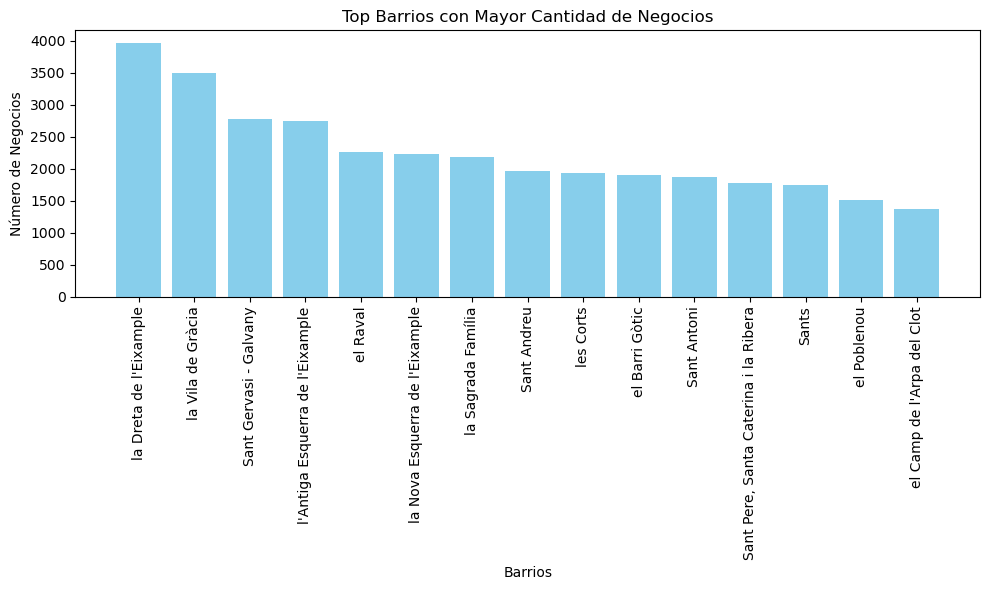

In [14]:
# Ordenar los barrios por la cantidad de negocios (de mayor a menor)
features_barrio_sorted = features_barrio.sort_values(by='negocios_por_barrio', ascending=False)

# Seleccionar los 10 barrios con más negocios
top_barrios = features_barrio_sorted.head(15)

# Gráfico de barras para comparar la cantidad de negocios por barrio (top 10)
plt.figure(figsize=(10, 6))
plt.bar(top_barrios['Nom_Barri'], top_barrios['negocios_por_barrio'], color='skyblue')

# Rotar las etiquetas del eje x para que se vean mejor
plt.xticks(rotation=90)

# Añadir título y etiquetas
plt.title('Top Barrios con Mayor Cantidad de Negocios')
plt.xlabel('Barrios')
plt.ylabel('Número de Negocios')

# Ajustar el layout para que todo se vea correctamente
plt.tight_layout()

# Mostrar el gráfico
plt.show()
